In [94]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from pathlib import Path

from sklearn.decomposition import PCA

In [32]:
sns.set_style('whitegrid')
sns.set_palette('pastel')
palette = sns.color_palette("Greens", n_colors=8)
plt.rcParams['figure.figsize'] = (6,4)
plt.rcParams['axes.prop_cycle'] = plt.cycler(color=[palette[3]])

In [3]:
train_ohs = pd.read_csv(Path('..','adults_data','adults_ohs_train.csv'))
test_ohs = pd.read_csv(Path('..','adults_data','adults_ohs_test.csv'))

In [4]:
corr_df = train_ohs.corr()

# find maximum values of correlation
max_10_corrs = pd.Series(corr_df.stack().unique()).nlargest(10).round(6)
max_corrs = max_10_corrs.values
max_corrs

min_10_corrs = pd.Series(corr_df.stack().unique()).nsmallest(10).round(6)
min_corrs = min_10_corrs.values
min_corrs

def correlated_variables(df, value):
    result = df.isin([value])
    locations = result[result].stack().index.tolist()
    for row, col in locations:
        print(value, "   ", row, "   ", col)
        
[correlated_variables(corr_df.round(6), val) for val in max_corrs[1:3]]
[correlated_variables(corr_df.round(6), val) for val in min_corrs[1:5]]       

0.896033     marital-status_Married-civ-spouse     relationship_Husband
0.896033     relationship_Husband     marital-status_Married-civ-spouse
0.581697     relationship_Husband     sex_Male
0.581697     sex_Male     relationship_Husband
-0.792243     race_Black     race_White
-0.792243     race_White     race_Black
-0.646039     marital-status_Married-civ-spouse     marital-status_Never-married
-0.646039     marital-status_Never-married     marital-status_Married-civ-spouse
-0.581697     relationship_Husband     sex_Female
-0.581697     sex_Female     relationship_Husband
-0.579587     marital-status_Never-married     relationship_Husband
-0.579587     relationship_Husband     marital-status_Never-married


[None, None, None, None]

In [ ]:
def custom_round

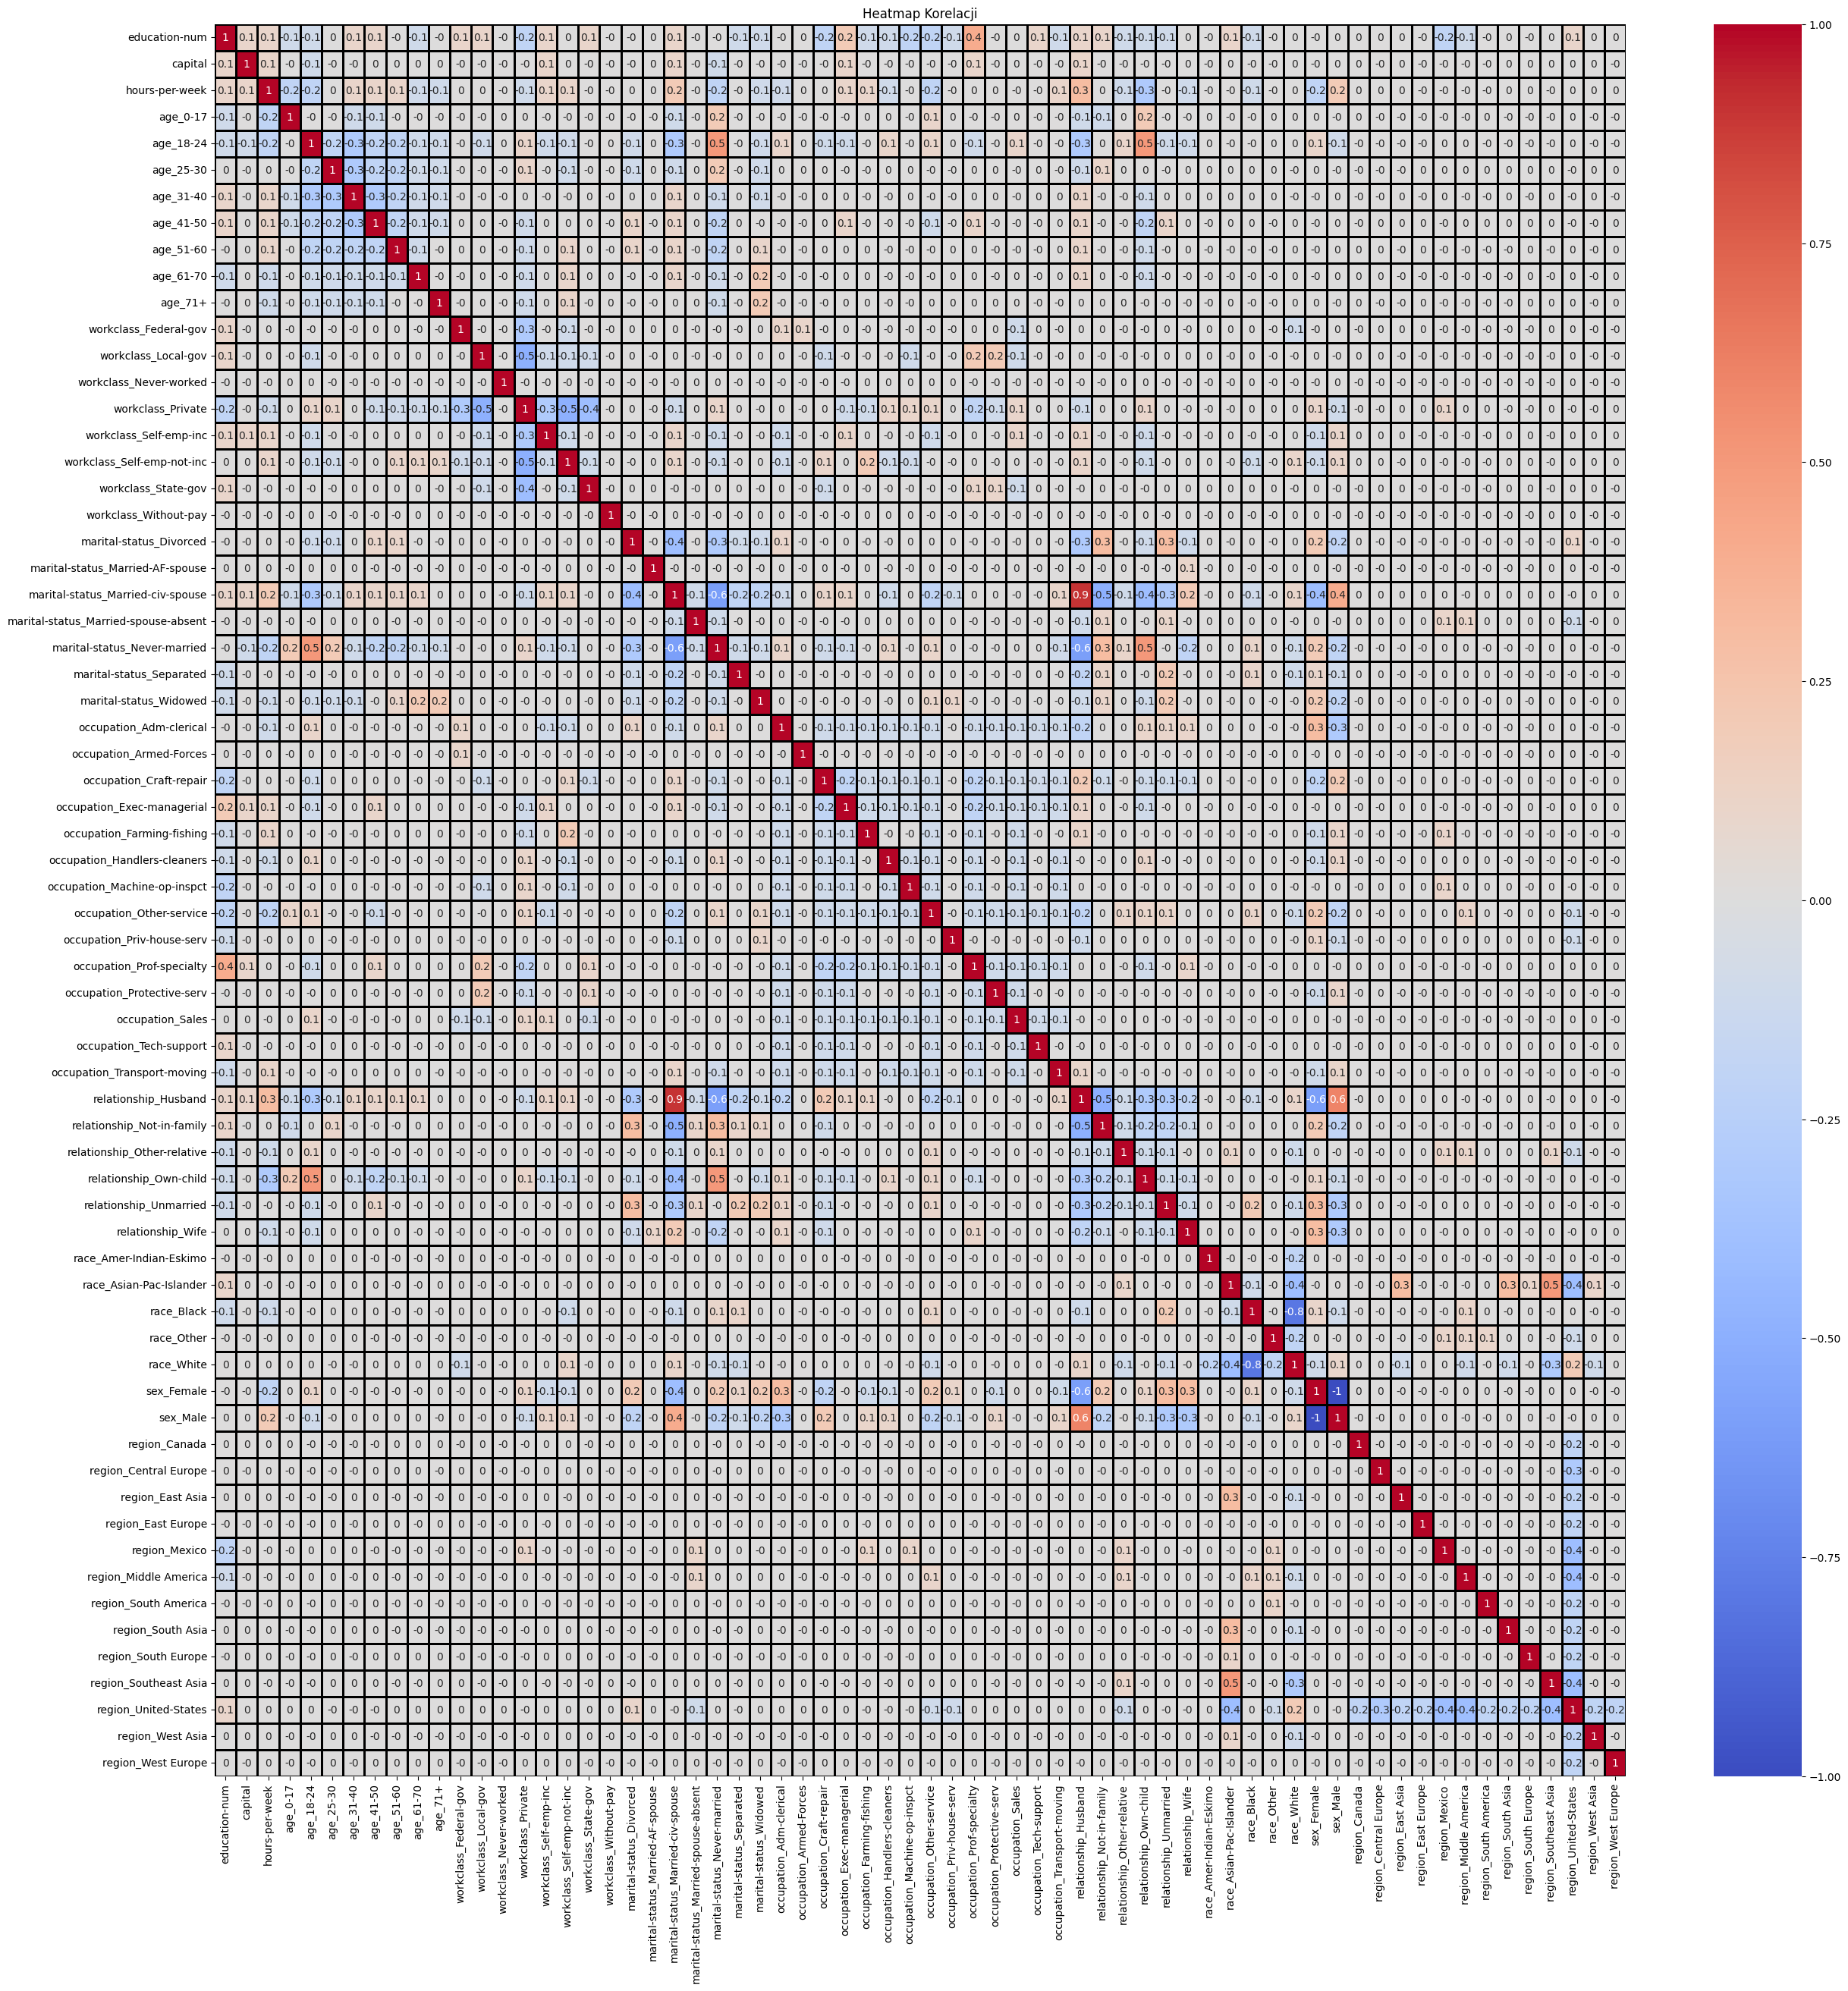

In [12]:
plt.figure(figsize=(30, 30))
sns.heatmap(corr_df.round(1), annot=True, cmap='coolwarm', center=0, linewidths=1, linecolor='black')
plt.title('Heatmap Korelacji')
plt.show()


In [115]:
def reduce_by_PCA(df):
    
    pca = PCA()
    pca.fit(df)
    
    explained_variance = pca.explained_variance_ratio_
    cumulative_variance = explained_variance.cumsum()
    
    plt.figure(figsize=(10, 6))
    x_axis = range(1, len(cumulative_variance) + 1)
    plt.plot(x_axis, cumulative_variance, marker='o', linestyle='--', color=palette[5], label='Cumulative Explained Variance')
    plt.plot(x_axis, [0.9] * len(x_axis), color='red', linestyle='--', label='90% Explained Variance')
    plt.plot(x_axis, [0.95] * len(x_axis), color='blue', linestyle='--', label='95% Explained Variance')
    plt.title('Cumulative Explained Variance by Principal Components')
    plt.xlabel('Number of Principal Components')
    plt.ylabel('Cumulative Explained Variance')
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()
    k_90 = next(i for (i, var) in enumerate(cumulative_variance) if var >= 0.90) + 1
    k_95 = next(i for (i, var) in enumerate(cumulative_variance) if var >= 0.95) + 1
    
    print('90% '+str(k_90), '95% '+str(k_95))
    
    optimal_PCA = PCA(n_components=k_95)
    reduced_data = pd.DataFrame(optimal_PCA.fit_transform(train_ohs))
    
    reduced_data.to_csv(Path('..','adults_data','PCA_train.csv'))
    
    plt.figure(figsize=(10, 6))
    plt.bar(range(1, k_95 + 1), explained_variance[:k_95], color=palette[2], alpha=0.7, label='Explained Variance')
    plt.step(range(1, k_95 + 1), cumulative_variance[:k_95], where='mid', color=palette[5], linestyle='--', label='Cumulative Explained Variance')
    plt.title('Explained Variance by Principal Components')
    plt.xlabel('Principal Component')
    plt.ylabel('Explained Variance Ratio')
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()


    return reduced_data

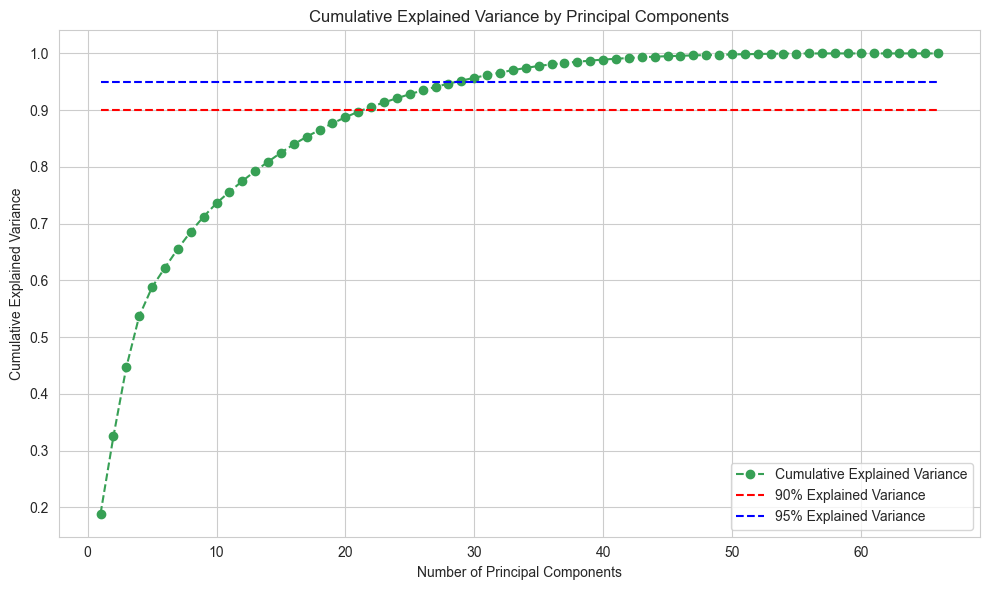

90% 22 95% 29


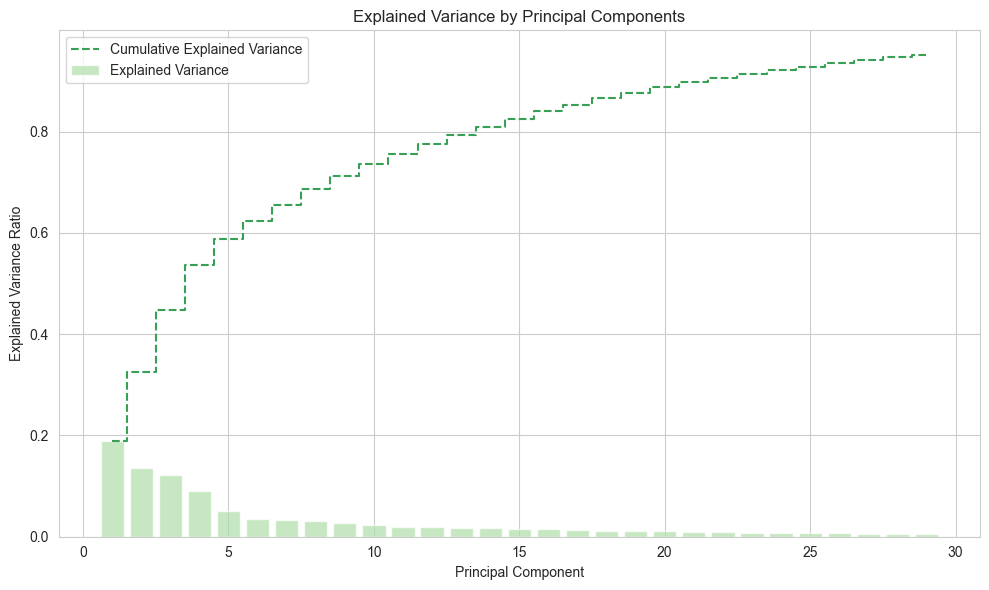

,0,1,2,3,4,5,6,7,8,9,...,19,20,21,22,23,24,25,26,27,28
0,-0.336874,0.204856,-0.154014,0.128376,0.750337,-0.175205,-0.713411,0.688197,-0.540590,0.040381,...,0.641362,0.082032,0.096448,0.363792,-0.251324,-0.295640,0.092426,-0.020047,-0.082675,-0.141814
1,0.244500,-0.704606,0.332213,-0.847251,0.191737,-0.383146,0.084025,0.521677,-0.344033,0.155682,...,0.486346,0.171169,-0.358702,-0.487094,0.355733,-0.548462,0.249922,-0.104634,-0.439566,-0.213471
2,0.253366,-0.509148,0.116380,-0.763222,-0.177563,0.027749,-0.239250,-0.343329,-0.047291,0.706139,...,0.198297,0.132681,0.080326,0.027462,-0.092819,0.131760,-0.012115,0.124994,0.087951,0.075480
3,1.256604,0.276829,-0.408690,-0.231626,-0.129502,0.831869,0.139315,-0.141153,-0.041729,-0.228311,...,-0.019153,-0.010015,-0.023590,0.512368,0.207123,-0.273170,-0.104299,-0.159563,-0.143792,-0.055703
4,-0.921048,0.238530,0.169158,-0.337125,0.974397,1.008752,-0.231805,-0.042750,-0.471163,0.020774,...,-0.263225,0.104814,0.039757,0.720995,0.106901,-0.311956,0.000728,-0.184340,-0.145653,0.011037
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36817,-1.445940,0.301910,0.286519,0.425749,0.645918,0.694386,0.709374,-0.110978,-0.264142,0.053516,...,-0.136042,0.022031,-0.038890,-0.055978,0.175411,-0.169915,0.073907,0.164241,0.839183,0.108365
36818,-0.897590,0.067448,0.235084,-0.249304,0.186601,0.611309,0.914246,-0.253645,0.160838,-0.699629,...,0.242715,-0.029956,-0.056803,0.491293,-0.052662,0.007864,-0.048311,0.692336,-0.303612,0.075289
36819,-1.144073,0.415798,-0.004161,0.968152,-0.176561,0.167215,-1.229911,0.463086,0.760641,-0.136404,...,0.106180,-0.166038,-0.194002,-0.205716,-0.083598,0.064227,-0.140694,-0.041910,0.124596,-0.187887
36820,0.270026,0.742516,-0.898432,0.215375,-0.946911,0.617516,0.755500,-0.206784,-0.092689,-0.162706,...,-0.264583,0.130792,0.023664,0.105412,0.080638,-0.068962,-0.051773,-0.072118,-0.093003,-0.017777


In [116]:
reduce_by_PCA(train_ohs)